## Проект 4

# Тема: Линейная регрессия с m признаками

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
import time
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

### Обучение модели линейной регрессии на sklearn

Генерируем данные:

In [ ]:
X, y = make_regression(n_samples=1000, # число строк
                          n_features=5,    # число признаков
                          n_informative=5, # целевая переменная зависит от всех признаков
                          noise = 5,
                          bias = 2,
                          random_state=42)

Создаём модель (объект класса) линейной регрессии:

In [ ]:
model = LinearRegression()

Обучаем модель:

In [ ]:
model.fit(X, y)

LinearRegression()

Выводим найденные коэффициенты линейной регрессии.

Свободный коэффициент:

In [ ]:
model.intercept_

1.691426699296051

Веса:

In [ ]:
model.coef_

array([28.34273825, 46.0063814 , 16.71776866, 24.63911531, 19.1812038 ])

### 1. Генерирую данные и значения целевой переменной (метки) для задачи регрессии, имеющие 5 признаков и 10000 наблюдений. Целевая переменная зависит только от 3 признаков

In [ ]:
X, y = make_regression(n_samples=10000, n_features=5, n_informative=3, random_state=0)
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df['y'] = y
df.head(10)

,x1,x2,x3,x4,x5,y
0,1.626721,-0.779551,0.424998,-0.924470,-0.155994,67.142573
1,0.857459,-0.220779,-0.141095,2.186978,-2.083955,87.968149
2,-0.230691,1.048480,-0.467983,-0.752907,-0.398645,-72.138773
3,-1.869872,1.547900,-0.454870,-0.263953,0.218162,-143.134080
4,0.856100,-0.384842,-0.199262,-1.470867,0.718149,18.634717
5,2.383773,0.065914,-1.059849,-1.417333,-0.244134,94.549823
6,0.172199,-0.213503,0.271128,0.795829,0.126306,58.601912
7,-0.519117,1.246374,0.104198,-0.518854,1.317810,-9.893685
8,-0.580615,0.255348,-0.162105,-1.409135,-1.445290,-175.284135
9,1.364031,0.585618,-0.772499,-0.068270,-0.114988,92.972144


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.003364,-0.001443,-0.010589,0.010414,-0.013988,-0.303792
std,1.001951,0.986802,0.998171,1.000669,0.995673,99.358758
min,-4.659953,-3.581046,-4.446632,-3.643294,-3.740101,-370.126227
25%,-0.679329,-0.652036,-0.687830,-0.661317,-0.678148,-67.669460
50%,-0.007264,-0.003734,-0.004055,0.010021,-0.007242,0.993723
75%,0.673609,0.648089,0.669284,0.692359,0.660202,68.118523
max,3.636102,3.803844,3.831790,3.702938,3.598310,385.544409


### 2. Вычисляю матрицу корреляции

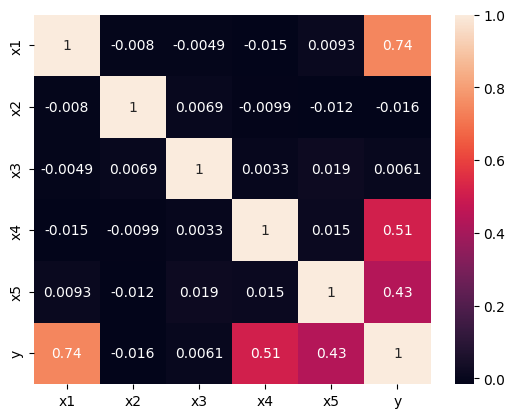

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 3. Функция X_, которая принимает матрицу X (двумерный numpy-массив) и присоединяет столбец единиц к X слева.

In [ ]:
def X_(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))
X_tilde = X_(X)


### 4. Напишите функцию, вычисляющую предсказание значения целевой переменной, как линейную функцию признака $\vec{\hat{y}} =\tilde{X}\vec{w}$, где $\tilde{X} $ - матрица признаков с присоединённым слева столбцом единиц. Назовите её predict. Вычислите её значения на сгенерированных данных X в случайной точке $w$.

In [ ]:
def predict(X_tilde, w):
    return X_tilde @ w
w_random = np.random.rand(X_tilde.shape[1])
y_pred = predict(X_tilde, w_random)

### 5. Напишите функцию ошибки (loss) линейной регрессии с множеством признаков в матричном виде. Примените функцию к сгенерированным выше данным X, y, а в качестве $w$ возьмите столбец случайных чисел.
Указание: $L = \frac{1}{n}(\tilde{X}\vec{w}- \vec{y})^{T}(\tilde{X}\vec{w}- \vec{y})$, здесь $\tilde{X}$ - это матрица X c присоединённым к ней столбцом единиц слева, а n - число строк матрицы X. Число элементов в $w$ должно соответствовать количеству столбцов в $\tilde{X}$.

In [ ]:
def loss(X_tilde, y, w):
    n = X_tilde.shape[0]
    residuals = X_tilde @ w - y
    return (1/n) * residuals.T @ residuals
L_value = loss(X_tilde, y, w_random)

### 6. Напишите функцию, которая вычисляет градиент функции ошибки (loss) с множеством признаков в матричном виде. Примените функцию к сгенерированным выше данным X, y, а в качестве $w$ возьмите столбец случайных чисел.

Указание: $\overrightarrow{{grad} (L)}  = \frac{2}{n}\tilde{X}^T(\tilde{X}\vec w- \vec y)$, здесь $\tilde{X}$ - это матрица X c присоединённым к ней столбцом единиц слева, а n - число строк матрицы X. Назовите созданную функцию gradient_F. Примените функцию к сгенерированным выше данным X, y, а в качестве $w$ возьмите столбец случайных чисел.

In [ ]:
def gradient_F(X_tilde, y, w):
    n = X_tilde.shape[0]
    return (2/n) * X_tilde.T @ (X_tilde @ w - y)
grad_L = gradient_F(X_tilde, y, w_random)

### 7. Создайте класс Linear_Regression_GD, реализующий модель линейной регрессии для данных имеющих произвольное количество признаков (столбцов). Создайте экземпляр класса, обучите модель и выведите получившиеся коэффициенты гиперплоскости (смещение и веса).
Указание: Необходимо создать класс, реализующий метод градиентного спуска для функции ошибки L.
Воспользуйтесь для этого классом GradientDiscent, написанный в предыдущих ноутбуках, подставив туда методы X_ и gradient_L. В методе fit задайте стартовое значение массивом нулей нужной длины. В функции GD параметры a и b можно заменить на X, y для наглядности.

In [ ]:
class Linear_Regression_GD():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def X_(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))

    def gradient_F(self, X_tilde, y):
        n = X_tilde.shape[0]
        return (2/n) * X_tilde.T @ (X_tilde @ self.w - y)

    def GD(self, X_tilde, y, w_start, learning_rate=0.01):
        self.w = w_start
        for _ in range(self.max_iter_):
            grad = self.gradient_F(X_tilde, y)
            self.w = self.w - learning_rate * grad

    def fit(self, X, y):
        X_tilde = self.X_(X)
        w_start = np.zeros(X_tilde.shape[1])
        self.GD(X_tilde, y, w_start)

    def predict(self, X):
        X_tilde = self.X_(X)
        return X_tilde @ self.w

model_gd = Linear_Regression_GD(max_iter=1000)
model_gd.fit(X, y)
print("Weights:", model_gd.w)

Weights: [-2.53595597e-09  7.42324779e+01 -7.24115036e-08  1.92165753e-08
  5.09413847e+01  4.17911587e+01]


### 8. Напечатайте уравнение гиперплоскости, полученной в результате применения модели линейной регрессии к данным X, y.
Указание: Используйте print. Уравнение гиперплоскости должно иметь вид $y = w_0 + w_1 x_1+ w_2 x_2 + \dots + w_m x_m$. Выводите коэффициенты гиперплоскости с точностью два знака после запятой. Учтите то, что эти коэффициенты могут быть и отрицательными.

In [ ]:
coeffs = model_gd.w
equation = "y = "
equation += f"{coeffs[0]:.2f}"
for i in range(1, len(coeffs)):
    coef = coeffs[i]
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.2f} x{i}"
print(equation)

y = -0.00 + 74.23 x1 - 0.00 x2 + 0.00 x3 + 50.94 x4 + 41.79 x5


### 9. Создайте новое наблюдение, например, взяв среднее значение по каждому столбцу X. Сделайте предсказание на нём.
Указание: Обртите внимание, что метод predict принимает только двумерные numpy-массивы.

In [ ]:
x_new = X.mean(axis=0)
x_new = x_new.reshape(1, -1)
y_new_pred = model_gd.predict(x_new)
print("Predicted value:", y_new_pred[0])


Predicted value: -0.303792322146321


### 10. Создайте класс Linear_Regression_analytical, реализующий модель линейной регрессии, где оптимальное значение находится аналитически. Создайте экземпляр класса, обучите модель и выведите получившиеся коэффициенты гиперплоскости (смещение и веса). Сравните с результатами, полученными методом градиентного спуска.

Указание: За основу возьмите класс Linear_Regression, только удалите в нём атрибут max_iter_ методы gradient_F и GD, а в методе fit возвращайте выражение: $(\tilde{X}^T \tilde{X})^{-1}\tilde{X}\vec y$

In [ ]:
class Linear_Regression_analytical():
    def __init__(self):
        self.w = None

    def X_(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))

    def fit(self, X, y):
        X_tilde = self.X_(X)
        self.w = np.linalg.inv(X_tilde.T @ X_tilde) @ X_tilde.T @ y

    def predict(self, X):
        X_tilde = self.X_(X)
        return X_tilde @ self.w

model_analytical = Linear_Regression_analytical()
model_analytical.fit(X, y)
print("Weights (analytical):", model_analytical.w)

Weights (analytical): [-4.44089210e-16  7.42324780e+01  2.60902411e-15 -4.44089210e-16
  5.09413848e+01  4.17911588e+01]


### 11. Создайте класс Linear_Regression_equation, реализующий модель линейной регрессии через решение нормального уравнения. Создайте экземпляр класса, обучите модель и выведите получившиеся коэффициенты гиперплоскости. Сравните с результатами, полученными аналитическим методом.

Указание: За основу возьмите класс Linear_Regression_analitical, только в методе fit реализуйте решение матричного уравнения $\tilde{X}^T\tilde{X}\vec w = \tilde{X}^T\vec y$. Это может быть сделано с помощью [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html) решающего уравнение вида $А\vec w = \vec b$.

In [ ]:
class Linear_Regression_equation():
    def __init__(self):
        self.w = None

    def X_(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))

    def fit(self, X, y):
        X_tilde = self.X_(X)
        A = X_tilde.T @ X_tilde
        b = X_tilde.T @ y
        self.w = np.linalg.solve(A, b)

    def predict(self, X):
        X_tilde = self.X_(X)
        return X_tilde @ self.w

model_equation = Linear_Regression_equation()
model_equation.fit(X, y)
print("Weights (normal equation):", model_equation.w)

Weights (normal equation): [ 7.27595761e-16  7.42324780e+01  1.03762549e-15 -1.46077889e-15
  5.09413848e+01  4.17911588e+01]


### 12. Замерьте время обучения моделей линейной регрессии, реализованных методом градиентного спуска, аналитическим методом и решением нормального уравнения на сгенерированных данных. Какая из них работает быстрее для данного набора данных?
Указание: Для замера времени используйте %timeit.

µs - это микросекунда (1 µs = 0,000001 sec), ms - это миллисекунда (1 ms = 0.001 sec).

In [ ]:
%timeit model_gd.fit(X, y)
%timeit model_analytical.fit(X, y)
%timeit model_equation.fit(X, y)


332 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
637 µs ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
480 µs ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### 13. Реализуйте в классе Linear_Regression_GD оптимизацию не методом градиентного спуска, а методом стохастического градиентного спуска. Назовите полученный класс Linear_Regression_SGD. Вычислите коэффициенты гиперплоскости w и убедитесь, что они получились примерно теми же.
Указание: Изменения произведите в методе gradient_F таким образом, чтобы градиент вычислялся не на всех значениях X и y, а на случайно выбранных наблюдениях в количестве size=600. Перемешать индексы случайным образом и выбрать из них нужное количество можно при помощи [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html). Не забудьте зафиксировать np.random.seed(42).

In [ ]:
class Linear_Regression_SGD():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def X_(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))

    def GD(self, X_tilde, y, w_start, learning_rate=0.01):
        self.w = w_start
        n = X_tilde.shape[0]
        np.random.seed(42)
        for _ in range(self.max_iter_):
            indices = np.random.choice(n, size=600, replace=False)
            X_sample = X_tilde[indices]
            y_sample = y[indices]
            grad = (2/600) * X_sample.T @ (X_sample @ self.w - y_sample)
            self.w = self.w - learning_rate * grad

    def fit(self, X, y):
        X_tilde = self.X_(X)
        w_start = np.zeros(X_tilde.shape[1])
        self.GD(X_tilde, y, w_start)

    def predict(self, X):
        X_tilde = self.X_(X)
        return X_tilde @ self.w

model_sgd = Linear_Regression_SGD(max_iter=1000)
model_sgd.fit(X, y)
print("Weights (SGD):", model_sgd.w)

Weights (SGD): [ 7.72058770e-09  7.42324779e+01 -7.92409850e-08  1.67899140e-08
  5.09413847e+01  4.17911587e+01]


# 14. Сравните время обучения моделей линейной регрессии, реализованных методом градиентного спуска и стохастического градиентного спуска с одинаковым количеством итераций градиентного спуска.
Указание: Возьмите max_iter = 1000.

In [ ]:
%timeit model_gd.fit(X, y)
%timeit model_sgd.fit(X, y)

351 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
426 ms ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 15. Создайте класс модели линейной регрессии из библиотеки sklearn. Обучите модель на сгенерированных данных и убедитесь, что коэффициенты гиперплоскости и предсказанное значение будут примерно теми же, что и у модели градиентного спуска, написанной своими руками.

 Указание: Воспользуйтесь классом [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Оптимальное коэффициенты гиперплоскости выводятся так: смещение выводится при помощи атрибута intrecept_, а оптимальные веса при помощи атрибута coef_.

In [ ]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
print("Intercept (sklearn):", model_sklearn.intercept_)
print("Coefficients (sklearn):", model_sklearn.coef_)

Intercept (sklearn): 2.942091015256665e-15
Coefficients (sklearn): [ 7.42324780e+01 -2.48689958e-14  1.73194792e-14  5.09413848e+01
  4.17911588e+01]


### 16. Сделайте предсказание на новом наблюдении. Убедитесь, значение будет примерно теми же, что и у модели градиентного спуска, написанной своими руками.

In [ ]:
y_new_pred_sklearn = model_sklearn.predict(x_new)
print("Predicted value (sklearn):", y_new_pred_sklearn[0])


Predicted value (sklearn): -0.3037923193468081


### 17. Напечатайте название каждого признака, а рядом найденный вес, ему соответствующий. Сделайте вывод какой признак наиболее сильно влияет на целевую переменную? А какой наименее значим?

In [ ]:
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']
weights = model_sklearn.coef_
for name, coef in zip(feature_names, weights):
    print(f"{name}: {coef}")
sorted_features = sorted(zip(feature_names, weights), key=lambda x: abs(x[1]), reverse=True)
print("Features sorted by importance:")
for name, coef in sorted_features:
    print(f"{name}: {coef}")

x1: 74.23247802969799
x2: -2.4868995751603507e-14
x3: 1.7319479184152442e-14
x4: 50.94138476808144
x5: 41.79115877081217
Features sorted by importance:
x1: 74.23247802969799
x4: 50.94138476808144
x5: 41.79115877081217
x2: -2.4868995751603507e-14
x3: 1.7319479184152442e-14


### 18. Визуализируйте значимость признаков на графике.
Указание: Используйте для построения графика [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

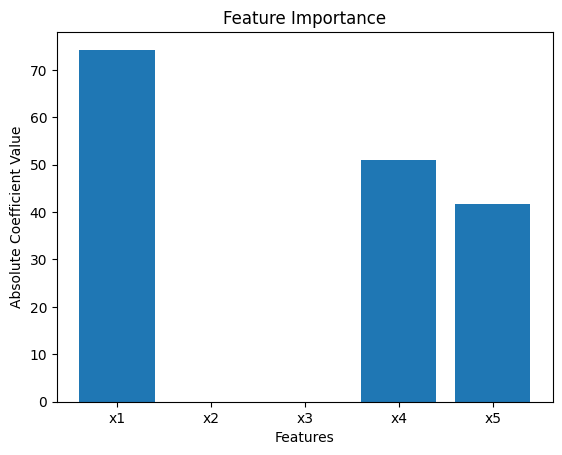

In [ ]:
plt.bar(feature_names, np.abs(weights))
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.show()